## Homework 2

* Import Boston Dataset from sklearn dataset class.
* Explore and analyse raw data.
* Do preprocessing for regression.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
* Evaluate the results of all models and choose the best performing model.

In [13]:
# Import boston dataset and convert it into pandas dataframe
from sklearn.datasets import load_boston
import pandas as pd

Xbos,ybos = load_boston(return_X_y=True)
df_boston = pd.DataFrame(Xbos,columns = load_boston().feature_names)


In [15]:
# Check duplicate values and missing data
df_boston.duplicated()

df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

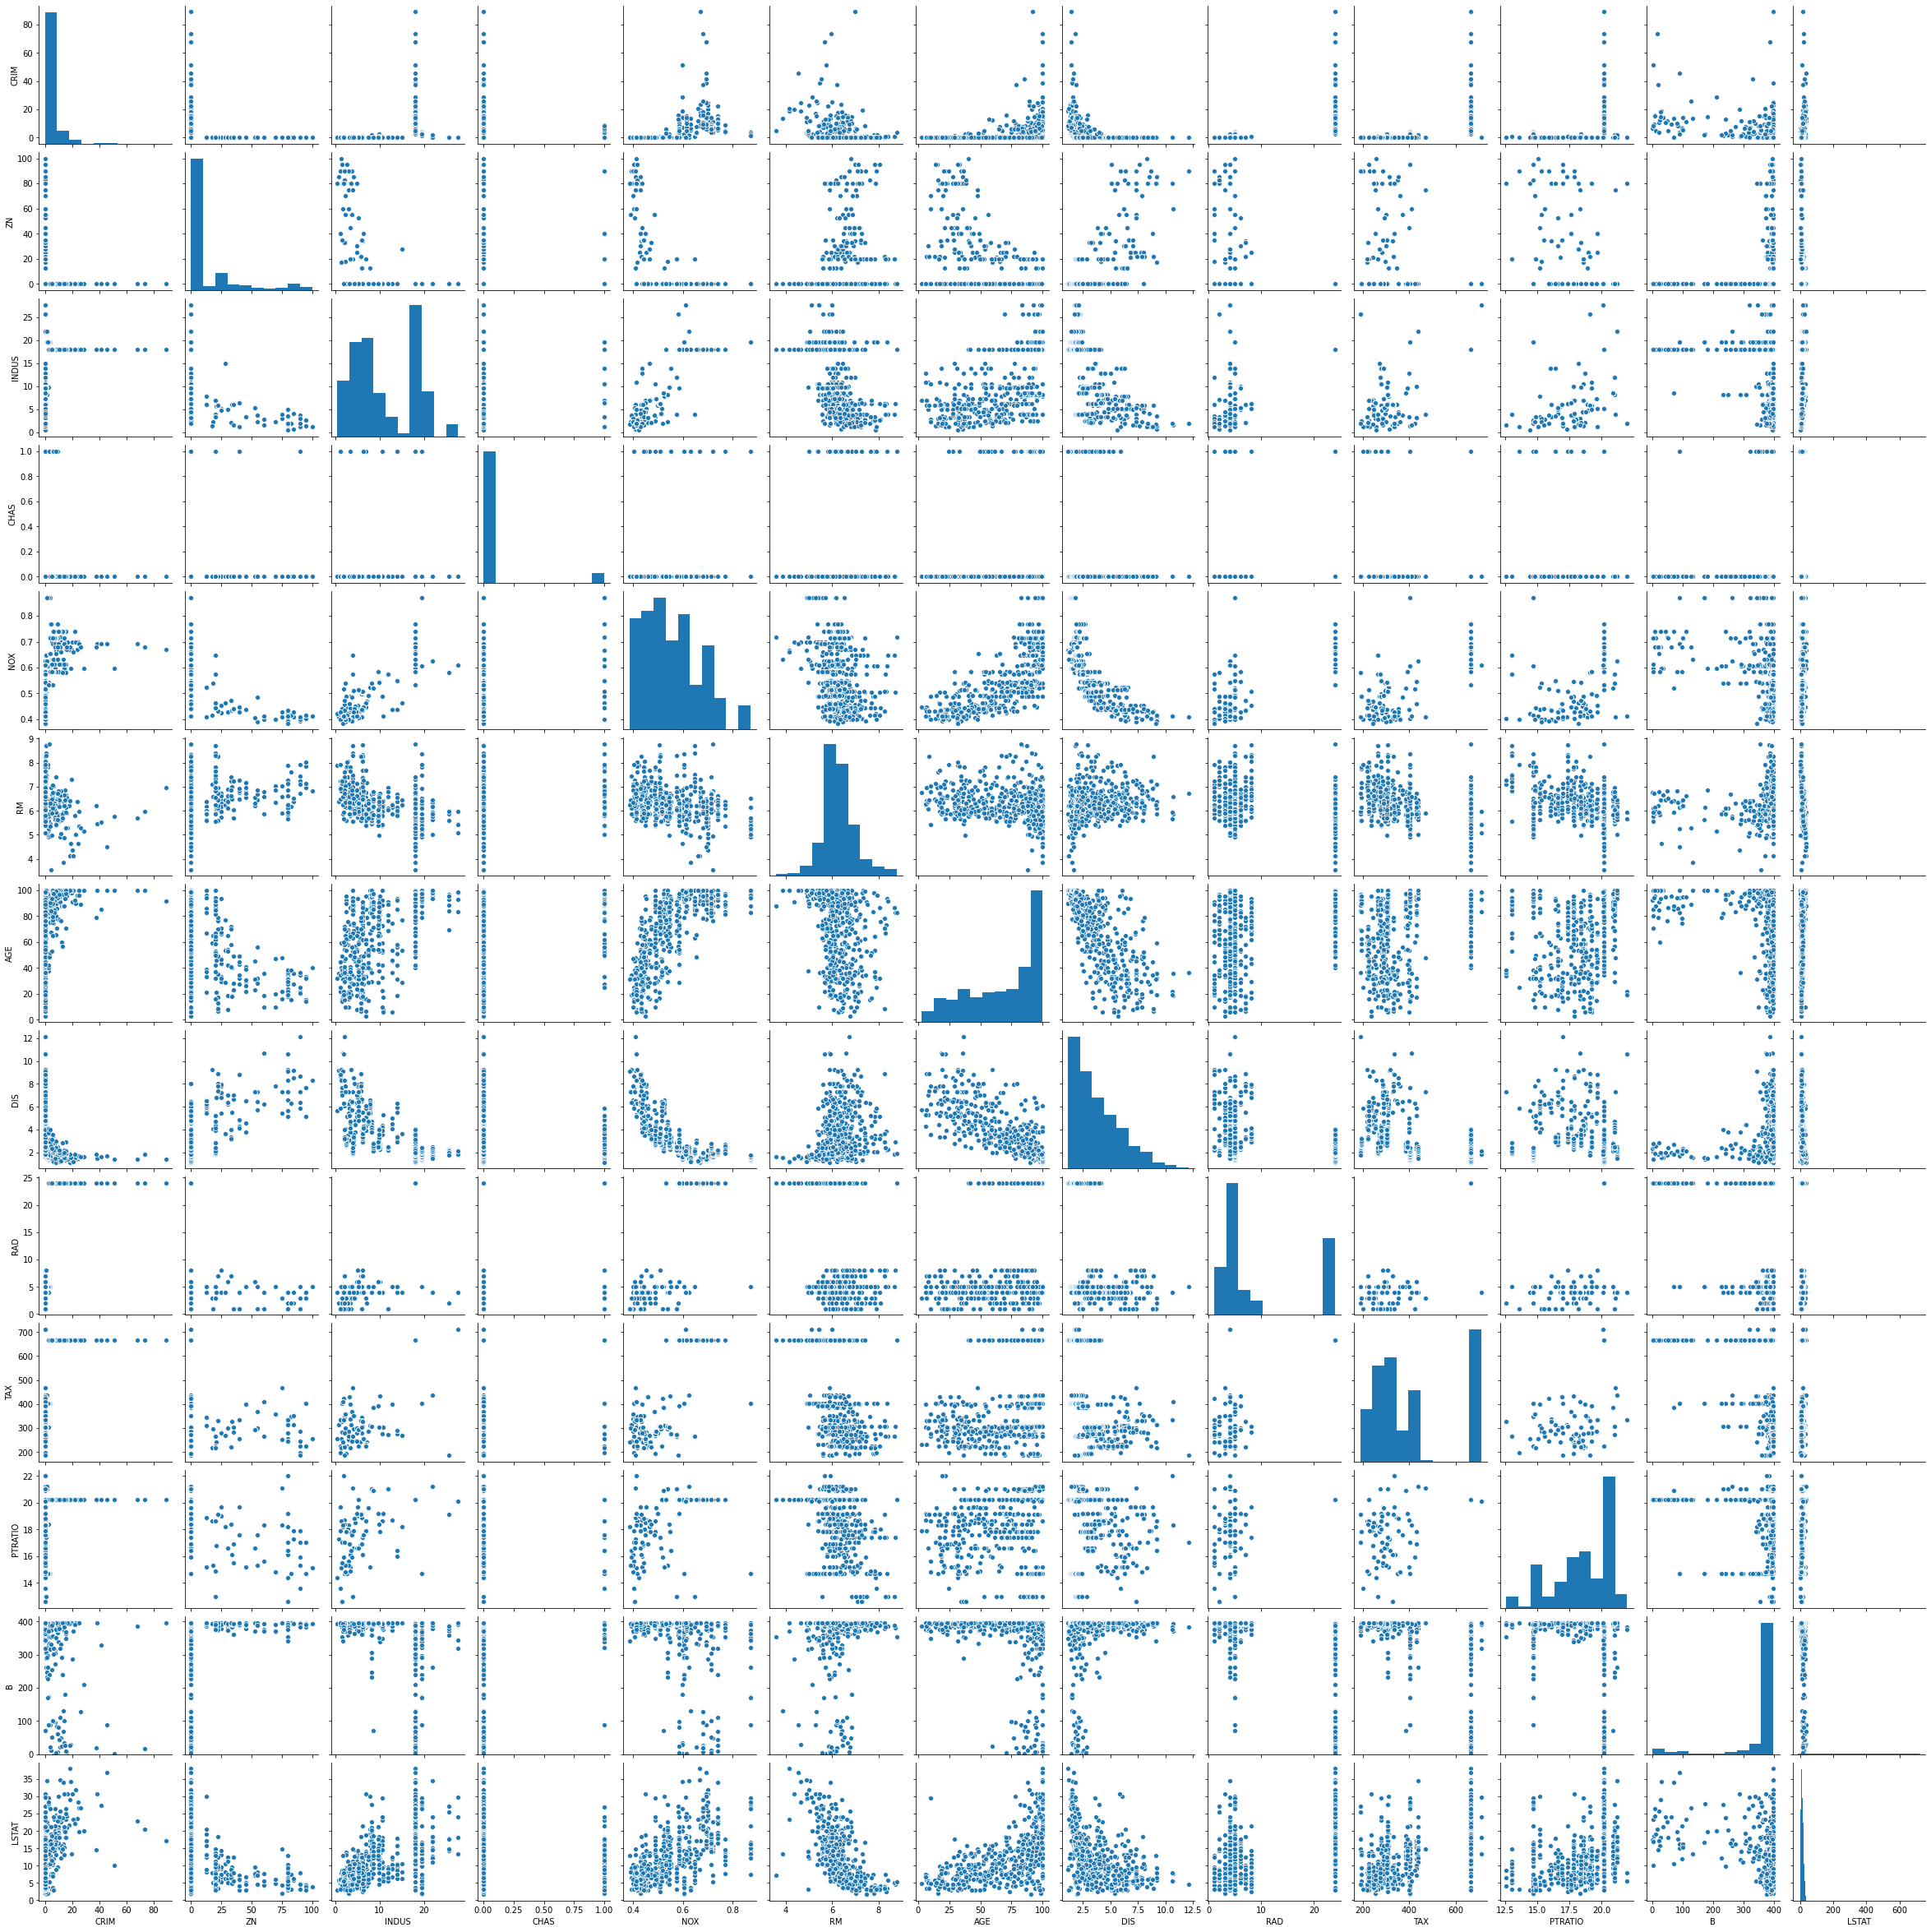

In [17]:
# Visualize data for each feature (pairplot,distplot)
import seaborn as sns
sns.pairplot(df_boston)


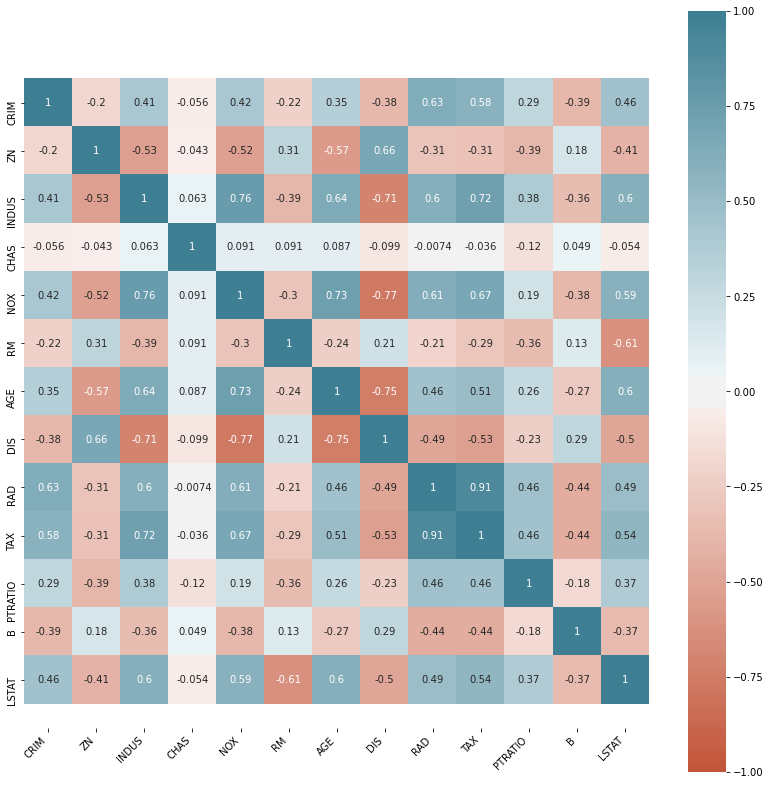

In [20]:
# Draw correlation matrix
import seaborn as sns
from matplotlib import pyplot as plt
df_boston.corr()
corr = df_boston.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [43]:
# Drop correlated features (check correlation matrix)

new_df = df_boston.drop(["AGE","INDUS","DIS"],axis=1)
new_df

,CRIM,ZN,CHAS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,1.0,273.0,21.0,393.45,6.48


 1    445
-1     61
Name: anomaly, dtype: int64


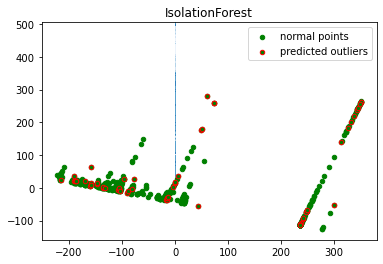

,CRIM,ZN,CHAS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT,anomaly
0,0.00632,18.0,0.0,0.538,6.575,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,0.0,0.469,6.421,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,0.0,0.469,7.185,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,0.0,0.458,6.998,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,0.0,0.458,7.147,3.0,222.0,18.7,396.90,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,1.0,273.0,21.0,391.99,9.67,1
502,0.04527,0.0,0.0,0.573,6.120,1.0,273.0,21.0,396.90,9.08,1
503,0.06076,0.0,0.0,0.573,6.976,1.0,273.0,21.0,396.90,5.64,1
504,0.10959,0.0,0.0,0.573,6.794,1.0,273.0,21.0,393.45,6.48,1


In [90]:
# Handle outliers (you can use IsolationForest)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest



#
#iso = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
#yhat = iso.fit_predict(X_train)
#yhat.shape

new_df.columns
#specify the 12 metrics column names to be modelled
to_model_columns=new_df.columns[1:11]
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(new_df[to_model_columns])
pred = clf.predict(new_df[to_model_columns])
new_df['anomaly']=pred
outliers=new_df.loc[new_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(new_df['anomaly'].value_counts())


from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(new_df[to_model_columns])
res=pd.DataFrame(pca.transform(new_df[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

new_df




In [111]:
# Normalize data
outliers = list(set(np.where(new_df["anomaly"] < 0)[0]))
len(outliers)
new_df1 = new_df.drop(outliers,axis = 0).reset_index(drop = False)
y_new = ybos[list(new_df1["index"])]
len(y_new)


X_new = new_df1.drop(['anomaly','index'], axis = 1)
X_new
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled


array([[0.00000000e+00, 1.80000000e-01, 0.00000000e+00, ...,
        2.55555556e-01, 1.00000000e+00, 9.83656174e-02],
       [2.35922539e-04, 0.00000000e+00, 0.00000000e+00, ...,
        5.33333333e-01, 1.00000000e+00, 2.24273608e-01],
       [2.35697744e-04, 0.00000000e+00, 0.00000000e+00, ...,
        5.33333333e-01, 9.89737254e-01, 6.96125908e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 0.00000000e+00, ...,
        8.88888889e-01, 1.00000000e+00, 1.18341404e-01],
       [1.16072990e-03, 0.00000000e+00, 0.00000000e+00, ...,
        8.88888889e-01, 9.91300620e-01, 1.43765133e-01],
       [4.61841693e-04, 0.00000000e+00, 0.00000000e+00, ...,
        8.88888889e-01, 1.00000000e+00, 1.86138015e-01]])

In [137]:
# Split dataset into train and test set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.3, random_state=42)

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.721074286125267
Score of the test set 0.7532964146599082


In [130]:
# Import ridge and lasso models from sklearn
from sklearn.linear_model import Ridge,Lasso
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)


clf1 = Lasso(alpha=1.0)
clf1.fit(X_train, y_train)
clf1.coef_

print("Coef of the Ridge",clf.coef_)
print("Coef of the Lasso",clf1.coef_)




Coef of the Ridge [ -7.78296562  -1.75834495   0.98483835  -1.27965088  20.7094284
   4.37433537  -4.5308205   -7.12392547   4.4968528  -15.81348606]
Coef of the Lasso [-0.          0.          0.         -0.          0.         -0.
 -2.28442139 -0.          0.         -5.62403733]


In [135]:
# Define 5 different alpha values for lasso and fit them. Print their R^2 sore on both
# train and test.
from sklearn.linear_model import Ridge,Lasso

alphas = np.arange(5)

coefs = []
for a in alphas:
    Las = Lasso(alpha=a, fit_intercept=False)
    Las.fit(X_train, y_train)
    coefs.append(Las.coef_)

coefs    



<ipython-input-135-7a881e3ad087>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Las.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3754.083966532213, tolerance: 17.972889000000002
  model = cd_fast.enet_coordinate_descent(


[array([-15.89909379,   0.16104301,   2.19149254,   1.63837833,
         35.68592723,   5.13431301,  -3.99422827,  -3.558901  ,
         11.36791425,  -9.52658227]),
 array([-0.        ,  0.        ,  0.        , -0.        , 19.47266313,
        -0.        , -0.        ,  0.        , 13.17170776, -0.        ]),
 array([-0.        ,  0.        ,  0.        ,  0.        ,  2.38622749,
         0.        ,  0.        ,  0.        , 20.47696596, -0.        ]),
 array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 20.51698725,  0.        ]),
 array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 19.37767096,  0.        ])]

In [136]:
# Define 5 different alpha values for Ridg and fit them. Print their R^2 sore on both
# train and test.

from sklearn.linear_model import Ridge,Lasso

alphas = np.arange(5)

coefs = []
for a in alphas:
    Rid = Ridge(alpha=a, fit_intercept=False)
    Rid.fit(X_train, y_train)
    coefs.append(Rid.coef_)

coefs

[array([-15.89909379,   0.16104301,   2.19149254,   1.63837833,
         35.68592723,   5.13431301,  -3.99422827,  -3.558901  ,
         11.36791425,  -9.52658227]),
 array([-10.4793607 ,   1.17044401,   1.89355845,   2.03689854,
         32.53296768,   3.63214424,  -3.35708738,  -2.5967521 ,
         12.16606992,  -9.72399751]),
 array([-7.99004789,  1.8767849 ,  1.62453778,  2.12838613, 30.0805887 ,
         2.81061938, -2.95093965, -1.93716285, 12.74511077, -9.43054478]),
 array([-6.54686325,  2.39723262,  1.41056286,  2.11191909, 28.10463661,
         2.2579543 , -2.65272814, -1.42023646, 13.17457364, -8.99544308]),
 array([-5.59797476,  2.79199153,  1.24250221,  2.05512122, 26.46888991,
         1.84836363, -2.41946419, -0.98955624, 13.49927265, -8.5268059 ])]

In [ ]:
# Make comment about results. Print best models coefficient.

En iyi şekilde Outlierları çıkararak oluşturulan modelde yüksek skor elde edildi.